# Course 2: Data Science with Python

# Task 3: Build and Evaluate Models

## Credit One Regression

## 1. Selecting and Dividing the Data

In [1]:
#Imports
#Numpy, pandas, scify, math, matplotlib
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pydotplus
import graphviz
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#SKLearn, need to specify where the function "lives" before importing it
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#from sklearn.datasets import load_digits
#from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#Helpers

%matplotlib inline

# Import the Data

In [2]:
#Import CSV file after Pre-Processing
rawData = pd.read_csv('credit_t3.csv')
rawData.head()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,age_cut,LIMIT_BAL_cut,PAY_SCORE,BILL_AMT1_cut,BILL_AMT6_cut,PAY_AMT6_cut,PAY_AMT6_cut2,PAY_AMT1_cut2,BILL_AMT1_cut2,PAY_AMT1_cut
0,0,1,20000,1,24,2,2,-1,-1,-2,...,20,0,-2,0,0,0,0,0,0,0
1,1,2,120000,2,26,-1,2,0,0,0,...,20,100,3,0,0,0,0,0,0,0
2,2,3,90000,2,34,0,0,0,0,0,...,30,0,0,0,0,0,0,0,20,0
3,3,4,50000,1,37,0,0,0,0,0,...,30,0,0,0,0,0,0,0,40,0
4,4,5,50000,1,57,-1,0,-1,0,0,...,50,0,-2,0,0,0,0,0,0,0


In [3]:
#Examine the structure of your data and ensure everything was imported in the 
#format you need for work.

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unnamed: 0                              30000 non-null  int64 
 1   ID                                      30000 non-null  int64 
 2   LIMIT_BAL                               30000 non-null  int64 
 3   MARRIAGE                                30000 non-null  int64 
 4   AGE                                     30000 non-null  int64 
 5   PAY_0                                   30000 non-null  int64 
 6   PAY_2                                   30000 non-null  int64 
 7   PAY_3                                   30000 non-null  int64 
 8   PAY_4                                   30000 non-null  int64 
 9   PAY_5                                   30000 non-null  int64 
 10  PAY_6                                   30000 non-null  int64 
 11  BI

# Selecting the Data

# Regression Models

In [4]:
#Lets select the features and the dependent variable:

#1. Select the features (you should now have determined a final set of features to be 
#used in your analysis after studying the correlation and covariance of the data):

#features
X = rawData.iloc[:,[4,5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#First One I used:
#[5,6,7,8,9,10,11,12,13,14,15,16,32]]
#Random Forest Regressor 0.3810245770100645
#Linear Regression 0.27090825335829827
#Support Vector Regression -0.0509024632695115


Summary of feature sample


<bound method NDFrame.head of        AGE  PAY_0  PAY_6  BILL_AMT1  BILL_AMT6  PAY_AMT1  PAY_AMT6  \
0       24      2     -2       3913          0         0         0   
1       26     -1      2       2682       3261         0      2000   
2       34      0      0      29239      15549      1518      5000   
3       37      0      0      46990      29547      2000      1000   
4       57     -1      0       8617      19131      2000       679   
...    ...    ...    ...        ...        ...       ...       ...   
29995   39      0      0     188948      15980      8500      1000   
29996   43     -1      0       1683          0      1837         0   
29997   37      4      0       3565      19357         0      3100   
29998   41      1     -1      -1645      48944     85900      1804   
29999   46      0      0      47929      15313      2078      1000   

       default payment next month_default  
0                                       1  
1                                       1

In [5]:
#2. Select the Dependent Variable (Remember - this is just for this example; 
#your final model might need to use something different):

#dependent variable
y = rawData['LIMIT_BAL']

# 2. Building the Models and Choosing the Right Model 

In [6]:
#print(cross_val_score(model, X, y, cv=3)) 

In [7]:
#Again while not mandatory, but it might be a good idea to validate that the 
#correct column is being used for the dependent variable:

#dependent variable
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [8]:
#Modeling Format:

#1. Lets go ahead and prepare each regression algorithm for use just as we did in course one

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [9]:
#2. To build and assess both models recursively, 
#we create an empty list to store the results and another to 
#hold the name of each algorithm so we can easily print out the results 
#and keep them separated as follows:

#regression
results = []
names = []

for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [10]:
#Here is the output:

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4223478700204722
Linear Regression 0.2770491773659906
Support Vector Regression -0.05029478574848759


In [11]:
#3. Use the model variables you established in step 2, 
#pass the training data to it in the following format (you'll need to use train_test_split prior):

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr1 = RandomForestRegressor()
#model name
rfrFit1 = rfr1.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit1.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.421
RMSE: 97877.459


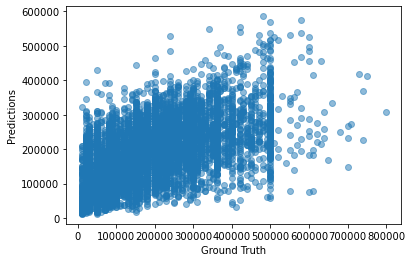

In [12]:
plt.scatter(y_test, rfrpreds, alpha= 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

# Trying different Features - Linear Regression

In [13]:
#3. Use the model variables you established in step 2, 
#pass the training data to it in the following format (you'll need to use train_test_split prior):

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
lr1 = LinearRegression()
#model name
lr1Fit1 = lr1.fit(X_train,y_train)

#Predictins
lr1preds = lr1Fit1.predict(X_test)
predRsquared = r2_score(y_test,lr1preds)
rmse = sqrt(mean_squared_error(y_test, lr1preds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.281
RMSE: 109123.850


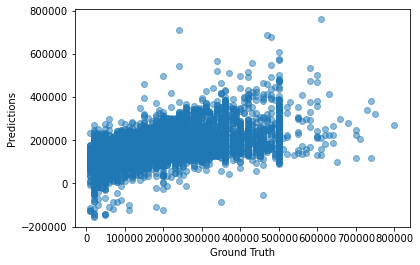

In [14]:
plt.scatter(y_test, lr1preds, alpha= 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [15]:
#Change Features
X = rawData.iloc[:,[4,5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
lr2 = LinearRegression()
#model name
lr2Fit2 = lr2.fit(X_train,y_train)

#Predictins
lr2preds = lr2Fit2.predict(X_test)
predRsquared = r2_score(y_test,lr2preds)
rmse = sqrt(mean_squared_error(y_test, lr2preds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.281
RMSE: 109123.850


# Trying different Features - Random Forest Regression

In [16]:
#Change Features
X = rawData.iloc[:,[4,5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr1 = RandomForestRegressor()
#model name
rfrFit1 = rfr1.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit1.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.420
RMSE: 97986.488


In [17]:
#Change Features
X = rawData.iloc[:,[5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr2 = RandomForestRegressor()
#model name
rfrFit2 = rfr2.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit2.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.370
RMSE: 102151.028


In [18]:
#Change Features
X = rawData.iloc[:,[4,5,11,17,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr3 = RandomForestRegressor()
#model name
rfrFit3 = rfr3.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit3.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.343
RMSE: 104262.908


In [19]:
#Change Features
X = rawData.iloc[:,[5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr4 = RandomForestRegressor()
#model name
rfrFit4 = rfr4.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit4.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.369
RMSE: 102227.684


# Switch to Classification Model

In [20]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unnamed: 0                              30000 non-null  int64 
 1   ID                                      30000 non-null  int64 
 2   LIMIT_BAL                               30000 non-null  int64 
 3   MARRIAGE                                30000 non-null  int64 
 4   AGE                                     30000 non-null  int64 
 5   PAY_0                                   30000 non-null  int64 
 6   PAY_2                                   30000 non-null  int64 
 7   PAY_3                                   30000 non-null  int64 
 8   PAY_4                                   30000 non-null  int64 
 9   PAY_5                                   30000 non-null  int64 
 10  PAY_6                                   30000 non-null  int64 
 11  BI

# Model Variation - Use LIMIT_BAL_CUT as the dependent variable 

In [21]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 1
X = rawData.iloc[:,[4,5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc1 = DecisionTreeClassifier()
dtcFit1 = dtc1.fit(X_train,y_train)

#Predictions
dtc1preds = dtcFit1.predict(X_test)

print(classification_report(y_test, dtc1preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      3467
         100       0.38      0.40      0.39      2172
         200       0.35      0.34      0.35      1881
         300       0.20      0.21      0.21       871
         400       0.14      0.13      0.14       342
         500       0.10      0.10      0.10       234
         600       0.09      0.08      0.09        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.46      9000
   macro avg       0.22      0.22      0.22      9000
weighted avg       0.46      0.46      0.46      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


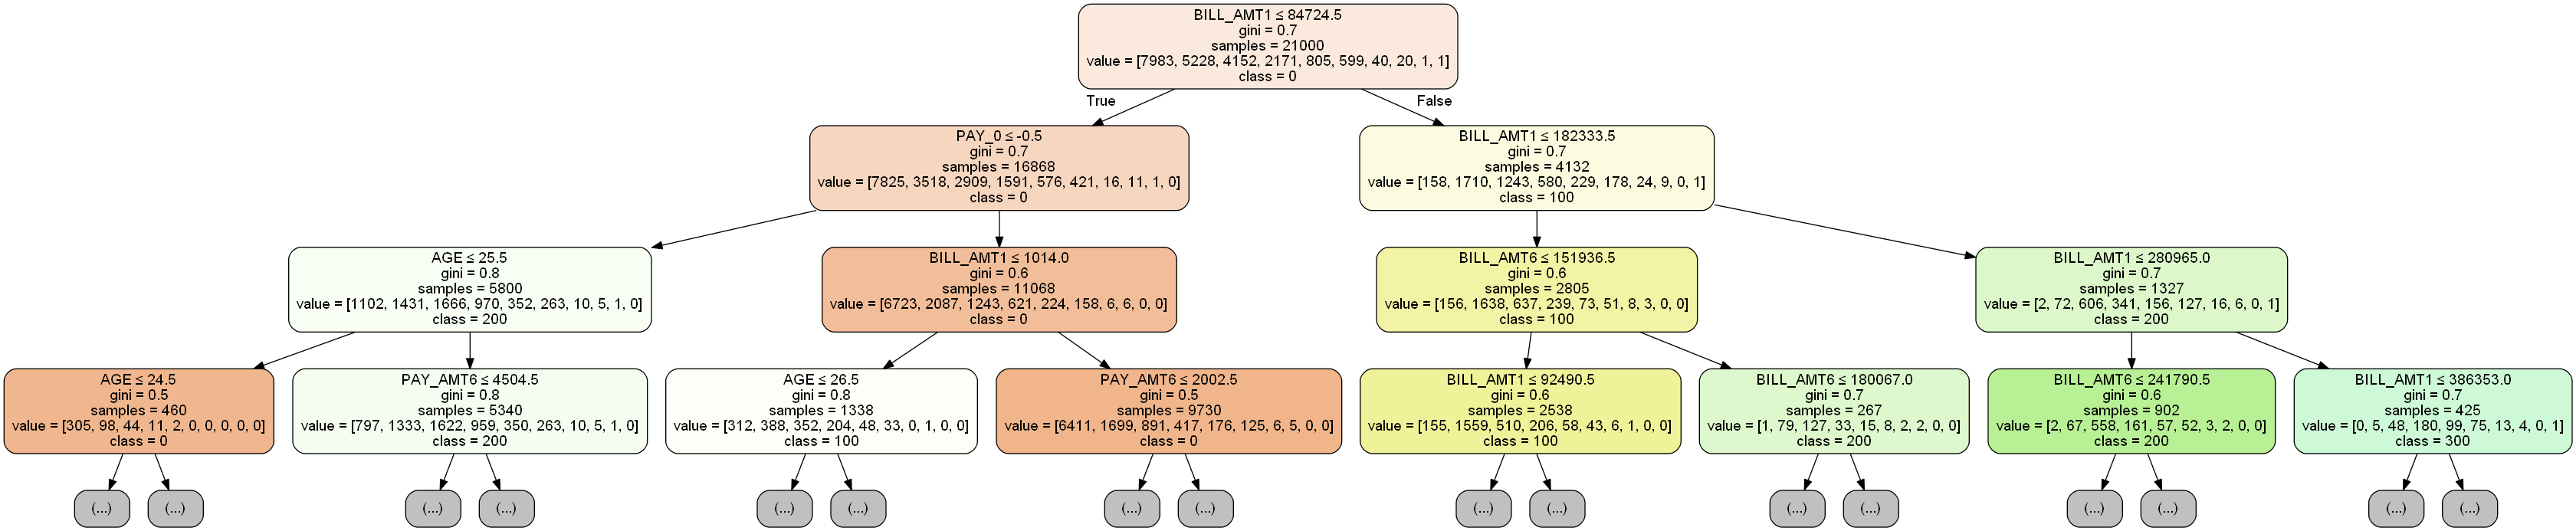

In [22]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit1, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['0','100','200','300','400','500','600','700','800'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [23]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 2
X = rawData.iloc[:,[11-23, 32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc2 = DecisionTreeClassifier()
dtcFit2 = dtc1.fit(X_train,y_train)

#Predictions
dtc2preds = dtcFit2.predict(X_test)

print(classification_report(y_test, dtc2preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.39      1.00      0.56      3467
         100       0.00      0.00      0.00      2172
         200       0.00      0.00      0.00      1881
         300       0.00      0.00      0.00       871
         400       0.00      0.00      0.00       342
         500       0.00      0.00      0.00       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.39      9000
   macro avg       0.04      0.11      0.06      9000
weighted avg       0.15      0.39      0.21      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 3
X = rawData.iloc[:,[2-32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc3 = DecisionTreeClassifier()
dtcFit3 = dtc3.fit(X_train,y_train)

#Predictions
dtc3preds = dtcFit3.predict(X_test)

print(classification_report(y_test, dtc3preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      3467
         100       0.31      0.43      0.36      2172
         200       0.30      0.23      0.26      1881
         300       0.14      0.11      0.13       871
         400       0.09      0.06      0.07       342
         500       0.06      0.05      0.05       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.38      9000
   macro avg       0.16      0.16      0.16      9000
weighted avg       0.37      0.38      0.37      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 4
X = rawData.iloc[:,[11,12,13,14,15,16,17,18,19,20,21,22,28,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc4 = DecisionTreeClassifier()
dtcFit4 = dtc4.fit(X_train,y_train)

#Predictions
dtc4preds = dtcFit4.predict(X_test)

print(classification_report(y_test, dtc4preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      3467
         100       0.38      0.40      0.39      2172
         200       0.34      0.32      0.33      1881
         300       0.19      0.20      0.19       871
         400       0.10      0.10      0.10       342
         500       0.12      0.12      0.12       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.45      9000
   macro avg       0.20      0.20      0.20      9000
weighted avg       0.45      0.45      0.45      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 5
X = rawData.iloc[:,[11,12,13,14,15,16,28,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc5 = DecisionTreeClassifier()
dtcFit5 = dtc5.fit(X_train,y_train)

#Predictions
dtc5preds = dtcFit5.predict(X_test)

print(classification_report(y_test, dtc5preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      3467
         100       0.38      0.39      0.38      2172
         200       0.34      0.32      0.33      1881
         300       0.18      0.18      0.18       871
         400       0.13      0.13      0.13       342
         500       0.08      0.09      0.08       234
         600       0.05      0.04      0.05        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.44      9000
   macro avg       0.20      0.20      0.20      9000
weighted avg       0.44      0.44      0.44      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 6
X = rawData.iloc[:,[17,18,19,20,21,22,28,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc6 = DecisionTreeClassifier()
dtcFit6 = dtc6.fit(X_train,y_train)

#Predictions
dtc6preds = dtcFit6.predict(X_test)

print(classification_report(y_test, dtc6preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.59      0.62      0.60      3467
         100       0.32      0.33      0.33      2172
         200       0.30      0.27      0.29      1881
         300       0.17      0.17      0.17       871
         400       0.08      0.08      0.08       342
         500       0.07      0.08      0.07       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1
         900       0.00      0.00      0.00         0

    accuracy                           0.39      9000
   macro avg       0.15      0.15      0.15      9000
weighted avg       0.39      0.39      0.39      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# # Model Variation - Change Dependent Variable to Default

In [28]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 1
X = rawData.iloc[:,[17,18,19,20,21,22,28,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc7 = DecisionTreeClassifier()
dtcFit7 = dtc7.fit(X_train,y_train)

#Predictions
dtc7preds = dtcFit7.predict(X_test)

print(classification_report(y_test, dtc7preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7052
           1       0.29      0.29      0.29      1948

    accuracy                           0.69      9000
   macro avg       0.54      0.55      0.55      9000
weighted avg       0.69      0.69      0.69      9000



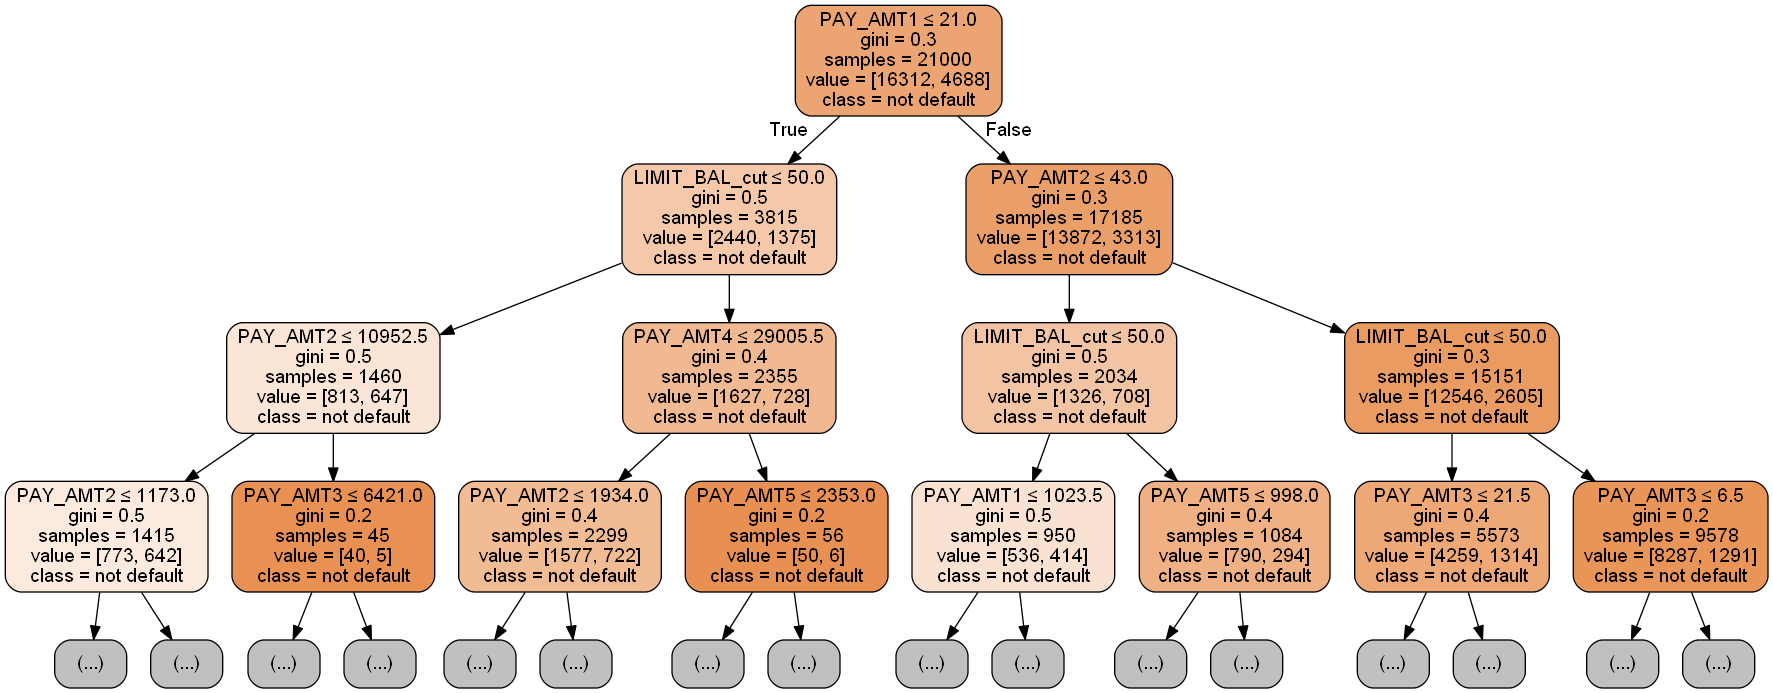

In [29]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit7, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [30]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 2
X = rawData.iloc[:,[4,5,10,11,16,17,22,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc8 = DecisionTreeClassifier()
dtcFit8 = dtc8.fit(X_train,y_train)

#Predictions
dtc8preds = dtcFit8.predict(X_test)

print(classification_report(y_test, dtc8preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7052
           1       0.37      0.40      0.38      1948

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.72      9000



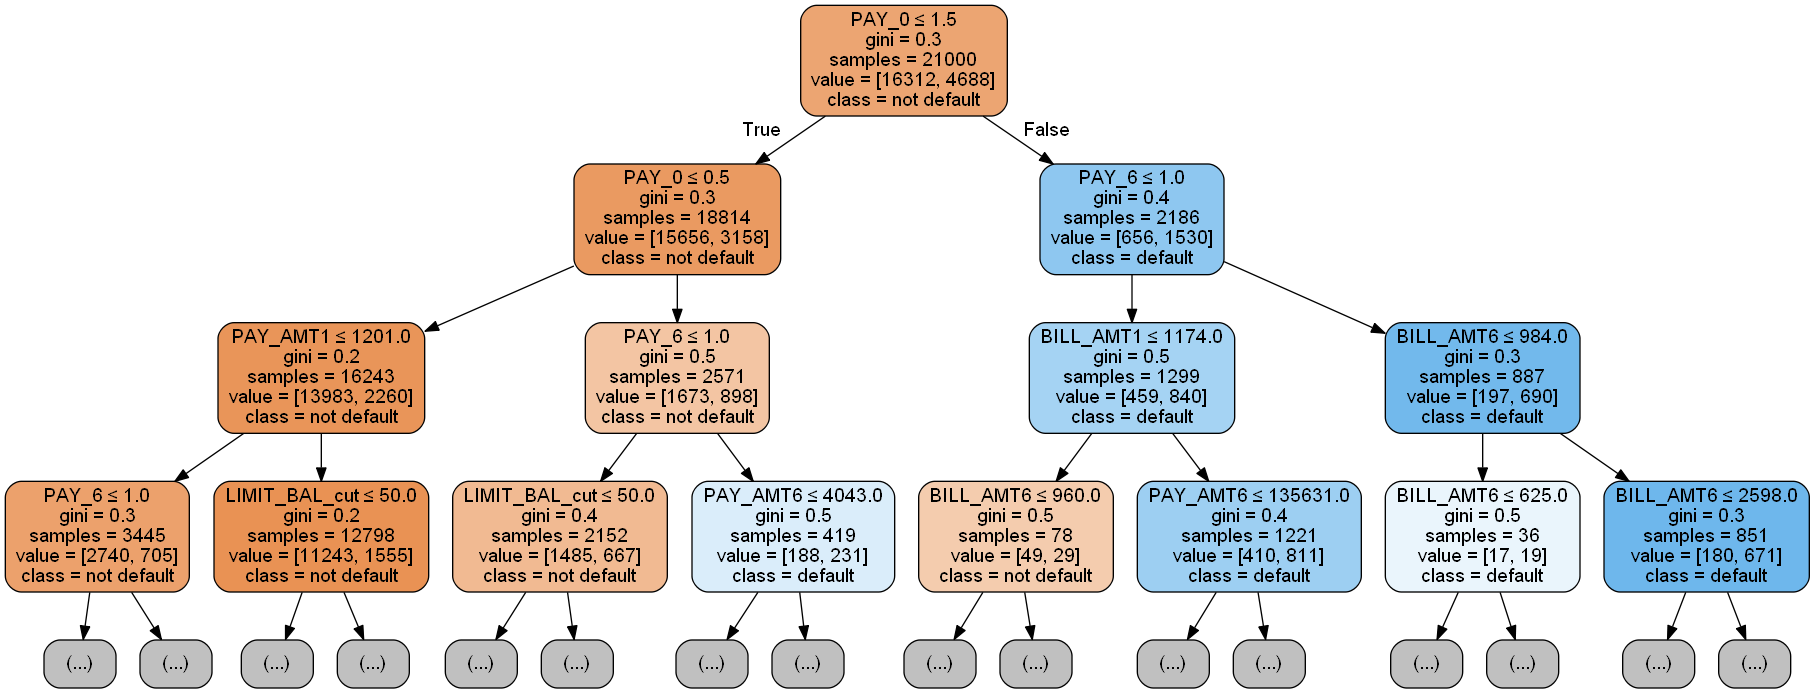

In [31]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit8, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [32]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 3
X = rawData.iloc[:,[17,28,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc9 = DecisionTreeClassifier()
dtcFit9 = dtc9.fit(X_train,y_train)

#Predictions
dtc9preds = dtcFit9.predict(X_test)

print(classification_report(y_test, dtc9preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      7052
           1       0.19      0.07      0.11      1948

    accuracy                           0.73      9000
   macro avg       0.48      0.49      0.47      9000
weighted avg       0.65      0.73      0.68      9000



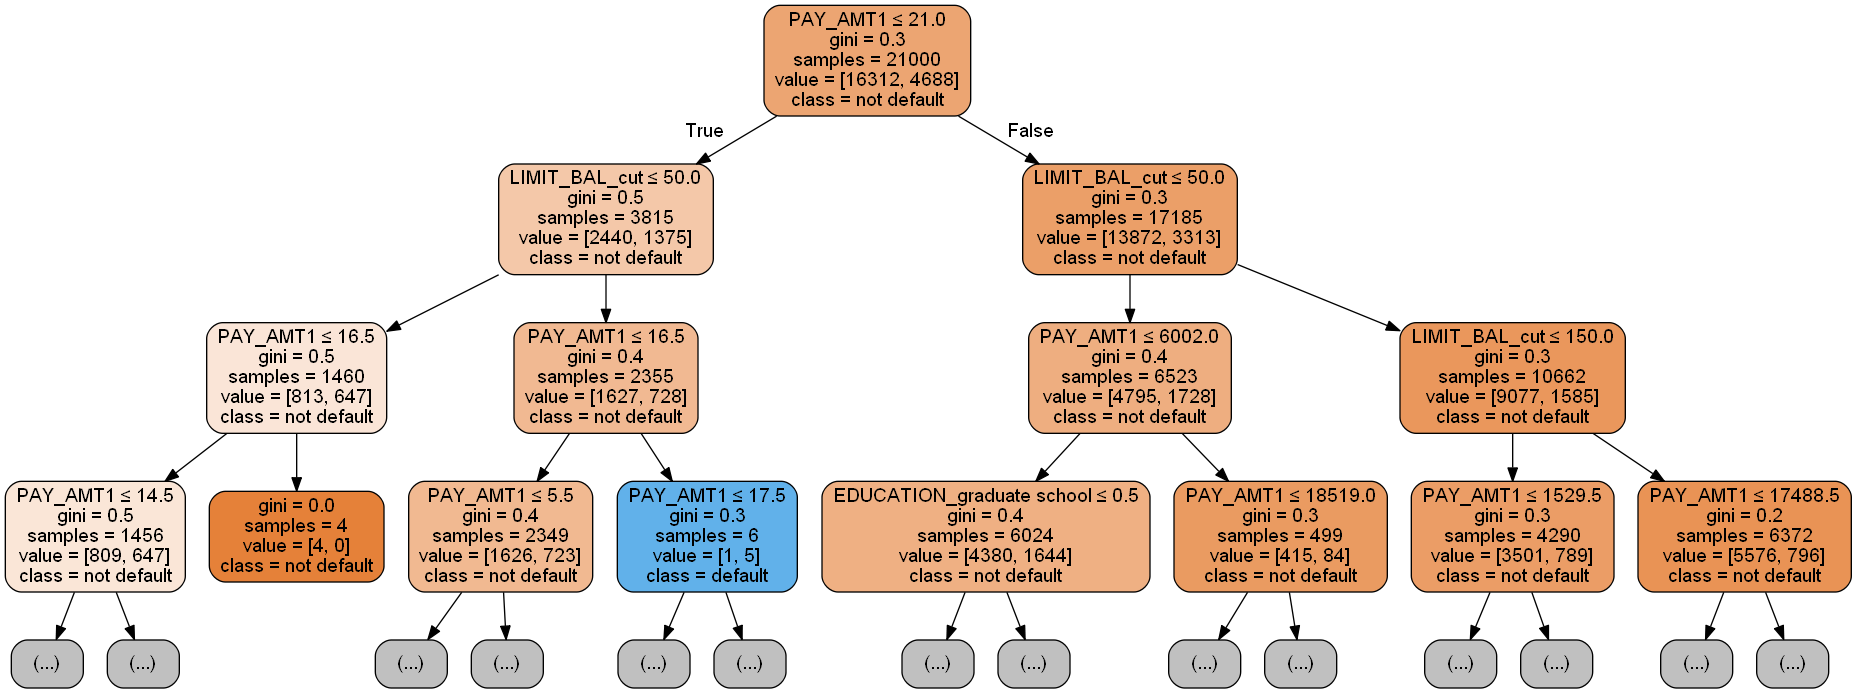

In [33]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit9, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())


In [34]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 4
X = rawData.iloc[:,[17,35]]

print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc10 = DecisionTreeClassifier()
dtcFit10 = dtc10.fit(X_train,y_train)

#Predictions
dtc10preds = dtcFit10.predict(X_test)

print(classification_report(y_test, dtc10preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7052
           1       0.18      0.07      0.10      1948

    accuracy                           0.73      9000
   macro avg       0.48      0.49      0.47      9000
weighted avg       0.65      0.73      0.68      9000



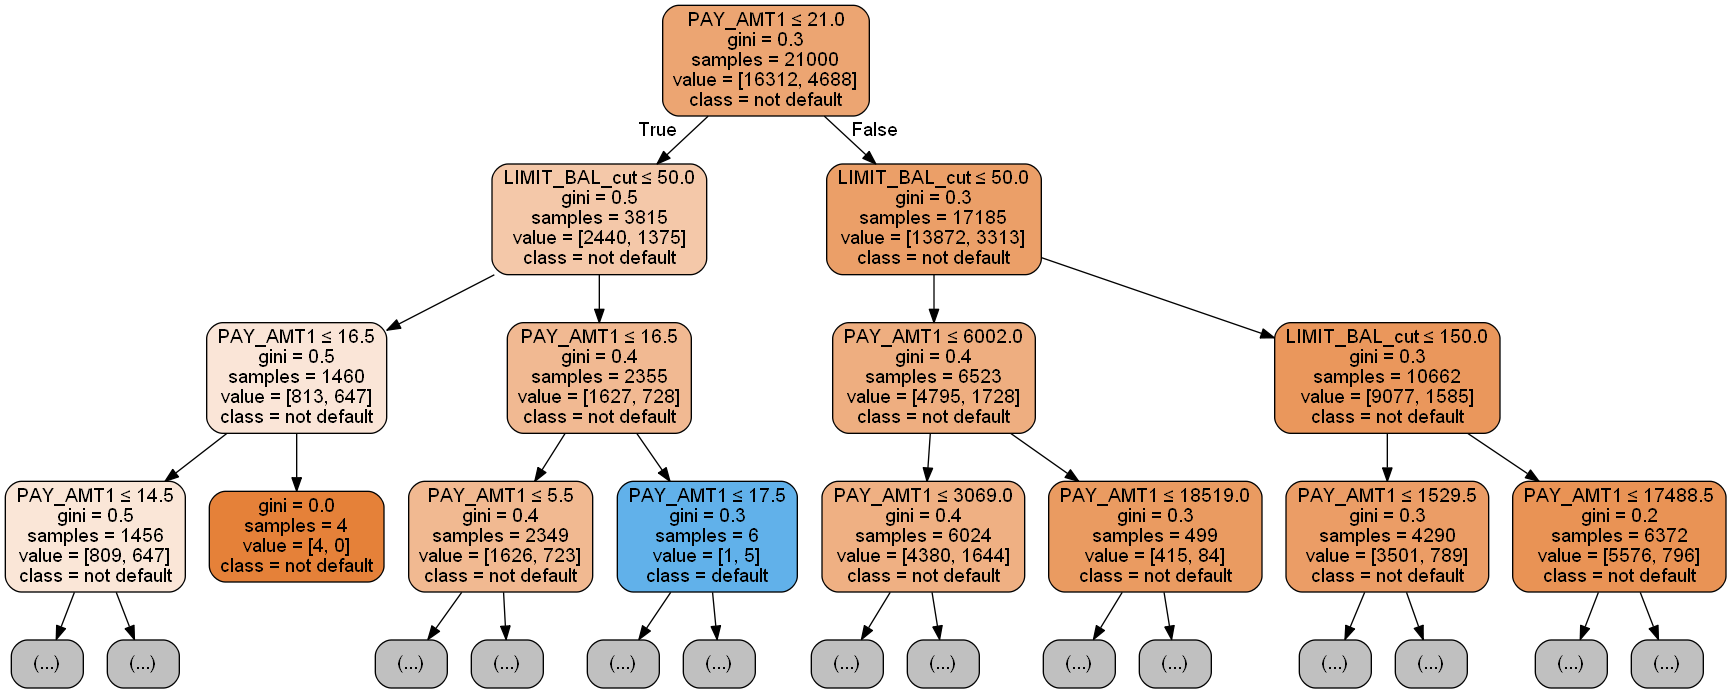

In [35]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit10, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [36]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 5
X = rawData.iloc[:,[4,5,10,11,16,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc11 = DecisionTreeClassifier()
dtcFit11 = dtc11.fit(X_train,y_train)

#Predictions
dtc11preds = dtcFit11.predict(X_test)

print(classification_report(y_test, dtc11preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7052
           1       0.38      0.40      0.39      1948

    accuracy                           0.73      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



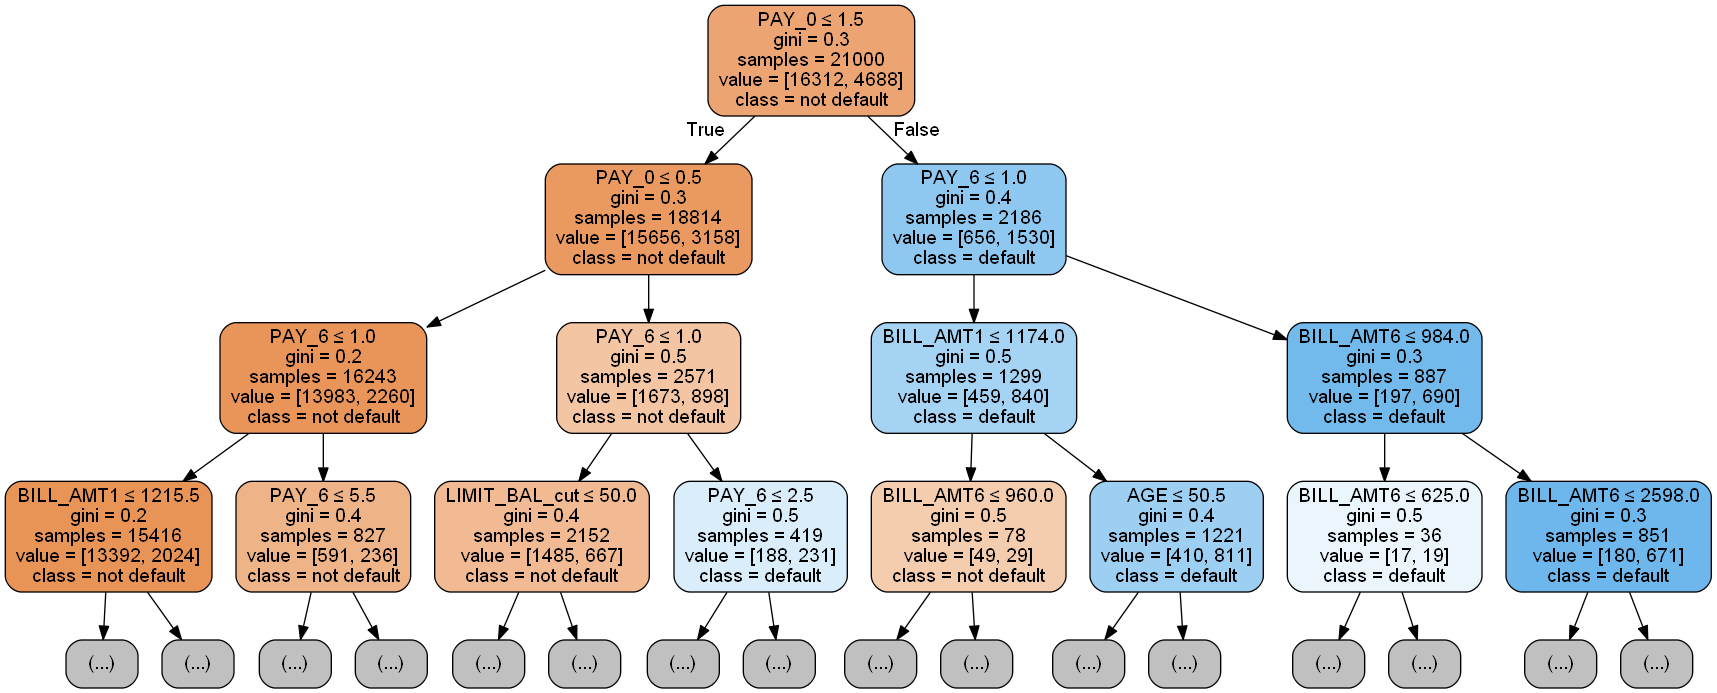

In [37]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit11, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [38]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 6
X = rawData.iloc[:,[28,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc12 = DecisionTreeClassifier()
dtcFit12 = dtc12.fit(X_train,y_train)

#Predictions
dtc12preds = dtcFit12.predict(X_test)

print(classification_report(y_test, dtc11preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7052
           1       0.38      0.40      0.39      1948

    accuracy                           0.73      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



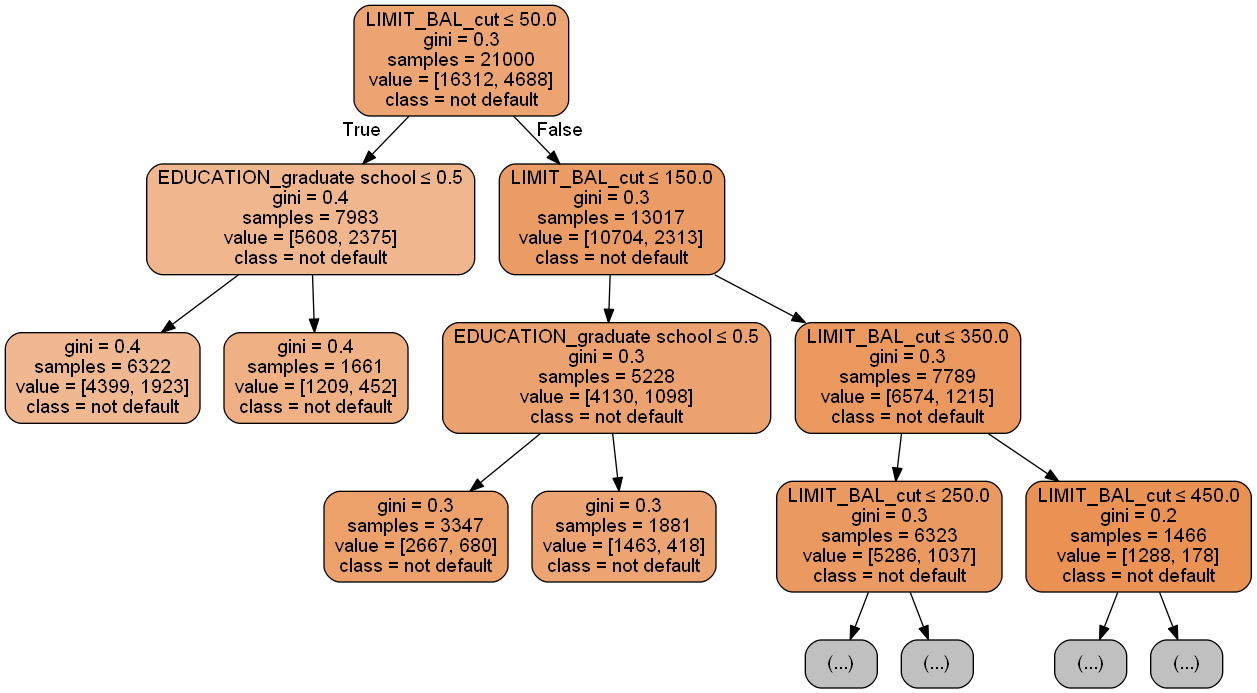

In [39]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit12, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [40]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 7
X = rawData.iloc[:,[11,28,16,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc13 = DecisionTreeClassifier()
dtcFit13 = dtc13.fit(X_train,y_train)

#Predictions
dtc13preds = dtcFit13.predict(X_test)

print(classification_report(y_test, dtc13preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      7052
           1       0.28      0.27      0.27      1948

    accuracy                           0.69      9000
   macro avg       0.54      0.54      0.54      9000
weighted avg       0.69      0.69      0.69      9000



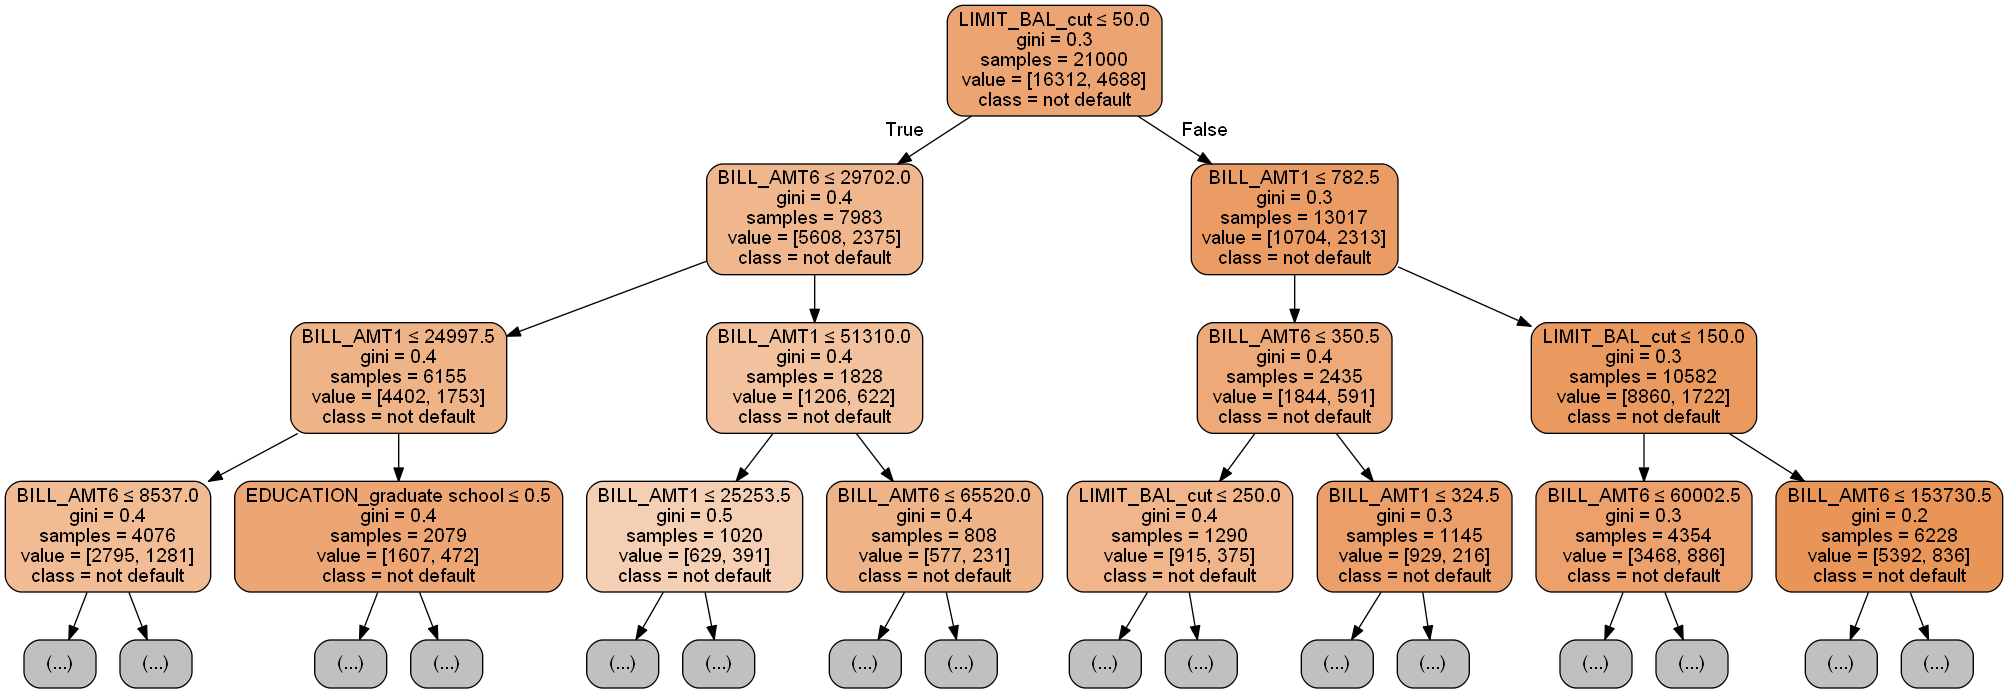

In [41]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit13, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())